In [381]:
import pandas as pd
import numpy as np

In [382]:
BIKE_DATA_LOCATION = '../_bike_data/bike_data.csv'
WEATHER_DATA_LOCATION = '../_weather_data/data/weather_data.csv'
NUMBER_OF_TRAINING_DAYS = 15
NUMBER_OF_TRAINING_DATA = NUMBER_OF_TRAINING_DAYS * 24

In [383]:
bike_df = pd.read_csv(BIKE_DATA_LOCATION,delimiter=';')
bike_df.head()

,time,LIDL BEŽIGRAD,ŠMARTINSKI PARK,SAVSKO NASELJE 1-ŠMARTINSKA CESTA,ČRNUČE,VILHARJEVA CESTA,MASARYKOVA DDC,POGAČARJEV TRG-TRŽNICA,CANKARJEVA UL.-NAMA,ANTONOV TRG,...,BTC CITY ATLANTIS,IKEA,MIKLOŠIČEV PARK,BARJANSKA C.-CENTER STAREJŠIH TRNOVO,LEK - VEROVŠKOVA,AMBROŽEV TRG,VOJKOVA - GASILSKA BRIGADA,RAKOVNIK,PREGLOV TRG,PLEČNIKOV STADION
0,2022-10-12-18-05,9,4,10,6,8,4,2,13,19,...,16,11,1.0,7,0,4.0,1,9,15,0
1,2022-10-12-18-10,10,4,10,6,8,3,0,3,19,...,16,11,0.0,7,0,2.0,1,11,15,0
2,2022-10-12-18-15,10,3,10,6,9,3,1,6,20,...,16,12,2.0,7,0,4.0,1,12,15,0
3,2022-10-12-18-20,7,3,9,7,8,2,0,3,20,...,16,11,6.0,7,1,3.0,0,13,15,0
4,2022-10-12-18-25,5,2,9,7,8,6,1,3,19,...,16,13,6.0,6,0,5.0,0,13,15,3


In [384]:
weather_df = pd.read_csv(WEATHER_DATA_LOCATION,delimiter=';')
weather_df.head()

,time,temperature at 2m,relative humidity,precipitation,wind_speed
0,2022-10-12-00-00,14.0,86,0.0,0.7
1,2022-10-12-00-10,14.0,86,0.0,0.4
2,2022-10-12-00-20,14.1,86,0.0,0.7
3,2022-10-12-00-30,14.0,86,0.0,0.6
4,2022-10-12-00-40,13.9,87,0.0,0.7


In [385]:
# join the two on the time column. Have the weather data on the left
joined_df = pd.merge(weather_df, bike_df, on='time')
joined_df.head()

,time,temperature at 2m,relative humidity,precipitation,wind_speed,LIDL BEŽIGRAD,ŠMARTINSKI PARK,SAVSKO NASELJE 1-ŠMARTINSKA CESTA,ČRNUČE,VILHARJEVA CESTA,...,BTC CITY ATLANTIS,IKEA,MIKLOŠIČEV PARK,BARJANSKA C.-CENTER STAREJŠIH TRNOVO,LEK - VEROVŠKOVA,AMBROŽEV TRG,VOJKOVA - GASILSKA BRIGADA,RAKOVNIK,PREGLOV TRG,PLEČNIKOV STADION
0,2022-10-12-18-10,16.1,70,0.0,1.1,10,4,10,6,8,...,16,11,0.0,7,0,2.0,1,11,15,0
1,2022-10-12-18-20,15.8,71,0.0,0.8,7,3,9,7,8,...,16,11,6.0,7,1,3.0,0,13,15,0
2,2022-10-12-18-30,15.5,73,0.0,0.6,4,2,9,7,7,...,17,13,5.0,7,0,7.0,2,13,14,4
3,2022-10-12-18-40,15.1,74,0.0,0.5,2,2,9,6,6,...,16,12,5.0,9,0,6.0,2,12,14,4
4,2022-10-12-18-50,14.7,76,0.0,1.0,3,2,9,7,6,...,17,10,4.0,8,0,4.0,0,16,16,1


In [386]:
# remove any duplicate rows
joined_df = joined_df.drop_duplicates()

In [387]:
joined_df['time'] = pd.to_datetime(joined_df['time'], format='%Y-%m-%d-%H-%M')

# Create a new column 'hour' that contains only the date and hour of 'time'
joined_df['hour'] = joined_df['time'].dt.floor('H')

# Now, group by the 'hour' column and calculate the mean
df_avg = joined_df.groupby('hour').mean()

C:\Users\sevcn\AppData\Local\Temp\ipykernel_6796\2596209800.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = joined_df.groupby('hour').mean()


In [388]:
stations = []
for column in df_avg.columns:
    # check if text in all caps
    if column.isupper():
        stations.append(column)

stations

['LIDL BEŽIGRAD',
 'ŠMARTINSKI PARK',
 'SAVSKO NASELJE 1-ŠMARTINSKA CESTA',
 'ČRNUČE',
 'VILHARJEVA CESTA',
 'MASARYKOVA DDC',
 'POGAČARJEV TRG-TRŽNICA',
 'CANKARJEVA UL.-NAMA',
 'ANTONOV TRG',
 'PRUŠNIKOVA',
 'TEHNOLOŠKI PARK',
 'KOSEŠKI BAJER',
 'TIVOLI',
 'TRŽNICA MOSTE',
 'GRUDNOVO NABREŽJE-KARLOVŠKA C.',
 'LIDL-LITIJSKA CESTA',
 'ŠPORTNI CENTER STOŽICE',
 'ŠPICA',
 'ROŠKA - STRELIŠKA',
 'BAVARSKI DVOR',
 'STARA CERKEV',
 'SITULA',
 'ILIRSKA ULICA',
 'LIDL - RUDNIK',
 'KOPALIŠČE KOLEZIJA',
 'POVŠETOVA - KAJUHOVA',
 'DUNAJSKA C.-PS MERCATOR',
 'CITYPARK',
 'KOPRSKA ULICA',
 'LIDL - VOJKOVA CESTA',
 'POLJANSKA-POTOČNIKOVA',
 'POVŠETOVA-GRABLOVIČEVA',
 'PARK NAVJE-ŽELEZNA CESTA',
 'ZALOG',
 'CESTA NA ROŽNIK',
 'HOFER-KAJUHOVA',
 'DUNAJSKA C.-PS PETROL',
 'STUDENEC',
 'PARKIRIŠČE NUK 2-FF',
 'BRATOVŠEVA PLOŠČAD',
 'KONGRESNI TRG-ŠUBIČEVA ULICA',
 'BS4-STOŽICE',
 'GERBIČEVA - ŠPORTNI PARK SVOBODA',
 'ŽIVALSKI VRT',
 'VOKA - SLOVENČEVA',
 'BTC CITY/DVORANA A',
 'TRNOVO',
 'P+R BARJE',
 '

In [389]:
x = df_avg.drop(stations, axis=1)
x.head()

,temperature at 2m,relative humidity,precipitation,wind_speed
hour,,,,
2022-10-12 18:00:00,15.440000,72.800000,0.0,0.800000
2022-10-12 19:00:00,13.766667,81.666667,0.0,0.516667
2022-10-12 20:00:00,12.733333,87.000000,0.0,0.916667
2022-10-12 21:00:00,11.833333,91.000000,0.0,0.550000
2022-10-12 22:00:00,11.300000,92.666667,0.0,0.500000


In [390]:
# add a column "work day"
from datetime import datetime

# calc by index
x['work_day'] = x.index.map(lambda t: 1 if t.weekday() < 5  else 0)
x.head()

,temperature at 2m,relative humidity,precipitation,wind_speed,work_day
hour,,,,,
2022-10-12 18:00:00,15.440000,72.800000,0.0,0.800000,1
2022-10-12 19:00:00,13.766667,81.666667,0.0,0.516667,1
2022-10-12 20:00:00,12.733333,87.000000,0.0,0.916667,1
2022-10-12 21:00:00,11.833333,91.000000,0.0,0.550000,1
2022-10-12 22:00:00,11.300000,92.666667,0.0,0.500000,1


In [391]:
# I want the first 13 days to be the training data
# and the last 6 days to be the test data

starting_date = joined_df['time'].iloc[0]
ending_date = joined_df['time'].iloc[-1]

print(starting_date)
print(ending_date)

# print the time difference in days
print((pd.to_datetime(ending_date) - pd.to_datetime(starting_date)).days)

2022-10-12 18:10:00
2022-10-31 21:30:00
19


In [392]:
x_train = x.iloc[:NUMBER_OF_TRAINING_DATA]
x_test = x.iloc[NUMBER_OF_TRAINING_DATA:]

print(x_train.shape)
print(x_test.shape)

x_train.head()

(360, 5)
(100, 5)


,temperature at 2m,relative humidity,precipitation,wind_speed,work_day
hour,,,,,
2022-10-12 18:00:00,15.440000,72.800000,0.0,0.800000,1
2022-10-12 19:00:00,13.766667,81.666667,0.0,0.516667,1
2022-10-12 20:00:00,12.733333,87.000000,0.0,0.916667,1
2022-10-12 21:00:00,11.833333,91.000000,0.0,0.550000,1
2022-10-12 22:00:00,11.300000,92.666667,0.0,0.500000,1


In [393]:
x_test.head()

,temperature at 2m,relative humidity,precipitation,wind_speed,work_day
hour,,,,,
2022-10-27 18:00:00,15.916667,88.833333,0.0,1.016667,1
2022-10-27 19:00:00,14.350000,93.000000,0.0,0.733333,1
2022-10-27 20:00:00,13.283333,95.333333,0.0,0.583333,1
2022-10-27 21:00:00,12.516667,96.000000,0.0,0.600000,1
2022-10-27 22:00:00,11.866667,96.833333,0.0,0.733333,1


In [394]:
y = {}
for station in stations:
    y[station] = df_avg[station]
    y[station] = np.array(y[station])

y

{'LIDL BEŽIGRAD': array([ 5.2       ,  7.16666667, 10.        , 10.16666667,  5.5       ,
         1.83333333,  0.33333333,  1.        ,  0.16666667,  0.        ,
         0.16666667,  1.        ,  0.16666667,  0.33333333,  1.16666667,
         2.16666667,  4.83333333,  5.83333333,  5.16666667,  4.5       ,
         1.16666667,  0.33333333,  1.        ,  2.83333333,  7.        ,
         7.        ,  1.83333333,  1.16666667,  0.66666667,  1.        ,
         0.5       ,  0.16666667,  1.        ,  0.66666667,  0.        ,
         0.        ,  0.        ,  0.16666667,  8.16666667, 10.33333333,
         7.5       ,  5.        ,  5.33333333,  5.16666667,  7.16666667,
         1.5       ,  2.33333333,  6.16666667,  3.16666667,  7.33333333,
         1.33333333,  1.16666667,  3.83333333,  3.        ,  1.        ,
         0.        ,  4.        ,  6.        ,  6.        ,  6.        ,
         6.16666667,  5.        ,  4.5       ,  3.66666667,  1.33333333,
        12.        , 11.        , 

In [395]:
y_train = {}
y_test = {}

for station in stations:
    y_train[station] = y[station][:NUMBER_OF_TRAINING_DATA]
    y_test[station] = y[station][NUMBER_OF_TRAINING_DATA:]
    
print(y_train)


{'LIDL BEŽIGRAD': array([ 5.2       ,  7.16666667, 10.        , 10.16666667,  5.5       ,
        1.83333333,  0.33333333,  1.        ,  0.16666667,  0.        ,
        0.16666667,  1.        ,  0.16666667,  0.33333333,  1.16666667,
        2.16666667,  4.83333333,  5.83333333,  5.16666667,  4.5       ,
        1.16666667,  0.33333333,  1.        ,  2.83333333,  7.        ,
        7.        ,  1.83333333,  1.16666667,  0.66666667,  1.        ,
        0.5       ,  0.16666667,  1.        ,  0.66666667,  0.        ,
        0.        ,  0.        ,  0.16666667,  8.16666667, 10.33333333,
        7.5       ,  5.        ,  5.33333333,  5.16666667,  7.16666667,
        1.5       ,  2.33333333,  6.16666667,  3.16666667,  7.33333333,
        1.33333333,  1.16666667,  3.83333333,  3.        ,  1.        ,
        0.        ,  4.        ,  6.        ,  6.        ,  6.        ,
        6.16666667,  5.        ,  4.5       ,  3.66666667,  1.33333333,
       12.        , 11.        ,  8.5       , 

In [396]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, max_error
from sklearn.model_selection import train_test_split


In [397]:
for station in stations:
    print("Training for station: ", station)
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(x_train, y_train[station])

    print(x_train.shape, y_train[station].shape, x_test.shape)

    y_pred = model.predict(x_test)
    print("R2 score: ", r2_score(y_test[station], y_pred))
    print("MSE: ", mean_squared_error(y_test[station], y_pred))
    print("Max error: ", max_error(y_test[station], y_pred))
    print("")

Training for station:  LIDL BEŽIGRAD
(360, 5) (360,) (100, 5)
R2 score:  -0.357965065409771
MSE:  26.98885688882929
Max error:  14.978245782902377

Training for station:  ŠMARTINSKI PARK
(360, 5) (360,) (100, 5)
R2 score:  -1.3975695364116438
MSE:  41.87491030977005
Max error:  13.785324074074062

Training for station:  SAVSKO NASELJE 1-ŠMARTINSKA CESTA
(360, 5) (360,) (100, 5)
R2 score:  -0.8283772003993077
MSE:  34.00921260445521
Max error:  10.788825396825398

Training for station:  ČRNUČE
(360, 5) (360,) (100, 5)
R2 score:  -0.6281161249827376
MSE:  45.602677899800874
Max error:  15.194555555555556

Training for station:  VILHARJEVA CESTA
(360, 5) (360,) (100, 5)
R2 score:  -0.3253530578213384
MSE:  45.05909938106856
Max error:  16.751962759848176

Training for station:  MASARYKOVA DDC
(360, 5) (360,) (100, 5)
R2 score:  0.005510149781190465
MSE:  38.93448482145185
Max error:  16.11782142857143

Training for station:  POGAČARJEV TRG-TRŽNICA
(360, 5) (360,) (100, 5)
R2 score:  -0.03

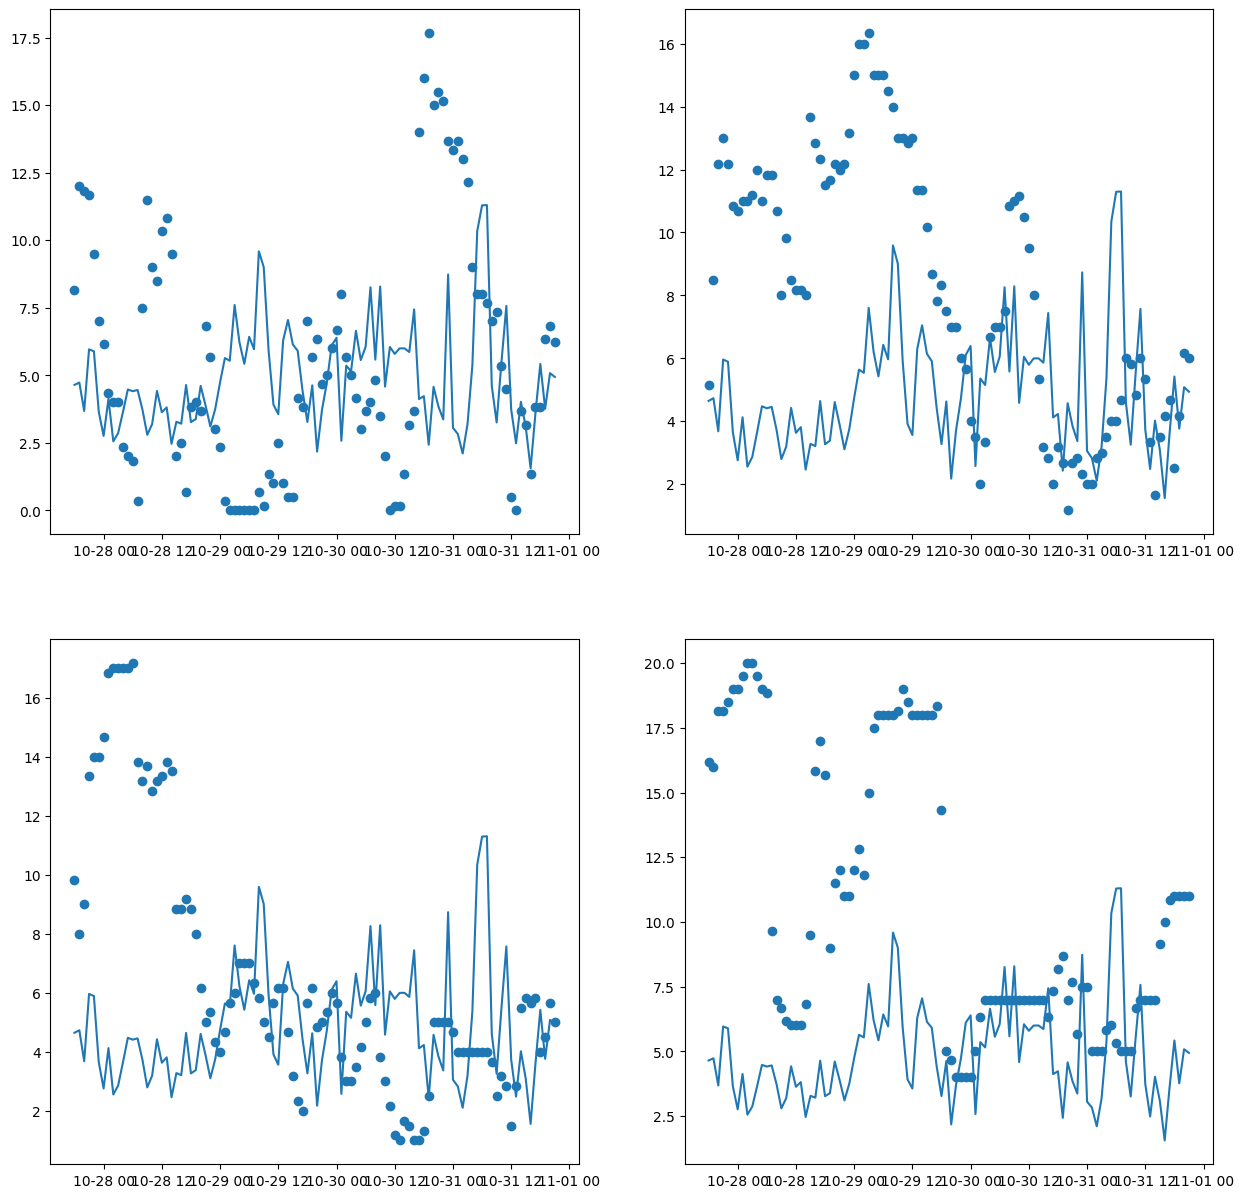

In [399]:
# for the first 4 stations, create a plot of the actual vs predicted values and make them into a 2 by 2 grid
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i in range(2):
    for j in range(2):
        station = stations[i*2 + j]
        # plot time vs predicted as line 
        axs[i, j].plot(x_test.index, y_pred, label='Predicted')
        # plot time vs actual as scatter
        axs[i, j].scatter(x_test.index, y_test[station], label='Actual')

plt.show()
